In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load connectome
W66=np.loadtxt("../Data/connectivity_matrix/weights.txt")

In [3]:
# prepare distribution

# remove 0 entries
w66_0=W66[W66!=0].flatten()

# compute histogram of distributions
hist, binning = np.histogram(w66_0 ,bins=50,range=(0,0.6), density=True)

# compute cumulative distribution
cumsum=np.cumsum(hist/hist.sum())

# number of random uniform numbers
new_nodes=1000 # has to be less than the number of zero entries in LR connectome
u=np.random.uniform(0,1, new_nodes)

# new distribution of weights
w_n=binning[np.searchsorted(cumsum[:-1],u)]

In [4]:
attempts=[10,20,50,100,200,300,400,500,600,700]
n_attempts=len(attempts)
w_all=np.zeros((n_attempts,66,66), dtype=np.float16)

In [5]:
reduced=W66[0:33,33:]
reduced_2=np.copy(reduced)

# tuples of empty indexes
empty_coords=[(i,j) for i in range(33) for j in range(33) if reduced[i,j]==0]



for j,n_to_fill in enumerate(attempts):

    np.random.shuffle(empty_coords)
    np.random.shuffle(w_n)
    reduced_2=np.copy(reduced)

    for i in range(n_to_fill): # the number of empty places i wanto to fill
        reduced_2[empty_coords[i][0], empty_coords[i][1]]=w_n[i]
        
    W66_new=np.copy(W66)
    W66_new[0:33,33:]=reduced_2
    W66_new[33:,0:33]=reduced_2.T
    w_all[j]=W66_new
    

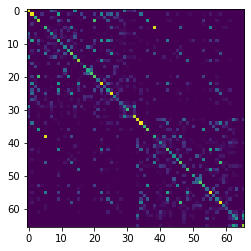

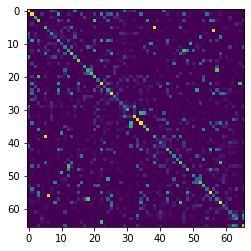

In [6]:
plt.figure(1)
plt.imshow(w_all[0], )
plt.figure(2)
plt.imshow(w_all[4])